Epoch 1000, cost = 2.156374
Epoch 2000, cost = 1.661461
Epoch 3000, cost = 1.396919
Epoch 4000, cost = 1.898701
Epoch 5000, cost = 1.177272
Epoch 6000, cost = 1.284038
Epoch 7000, cost = 1.975906
Epoch 8000, cost = 1.345142
Epoch 9000, cost = 0.978958
Epoch 10000, cost = 1.369487
Epoch 11000, cost = 1.591825
Epoch 12000, cost = 0.582861
Epoch 13000, cost = 1.001413
Epoch 14000, cost = 1.708619
Epoch 15000, cost = 0.813296


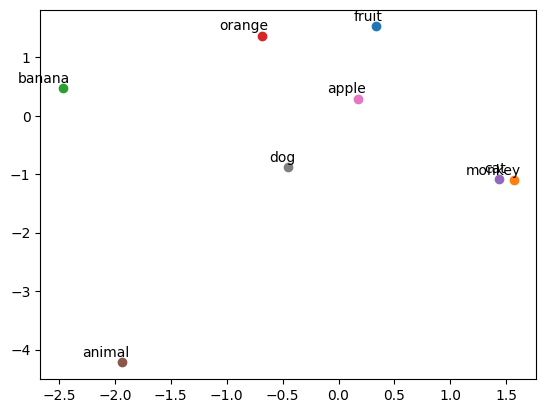

In [3]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

def random_batch():
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(skip_grams)), batch_size, replace=False)

    for i in random_index:
        random_inputs.append(np.eye(voc_size)[skip_grams[i][0]])  # target
        random_labels.append(skip_grams[i][1])  # context word

    return random_inputs, random_labels

# Model
class Word2Vec(nn.Module):
    def __init__(self):
        super(Word2Vec, self).__init__()
        # W and WY is not Transpose Relationship
        self.W = nn.Linear(voc_size, embedding_size, bias=False)  # voc_size > embedding_size Weight
        self.WT = nn.Linear(embedding_size, voc_size, bias=False)  # embedding_size > voc_size Weight

    def forward(self, X):
        # X : [batch_size, voc_size]
        hidden_layer = self.W(X)  # hidden_layer : [batch_size, embedding_size]
        output_layer = self.WT(hidden_layer)
        return output_layer

if __name__=="__main__":
    batch_size = 2
    embedding_size = 2

    sentences = ["apple banana fruit", "banana orange fruit", 'orange banana fruit', 'dog cat animal', 'cat monkey animal', 'monkey dog animal']

    word_sequence = " ".join(sentences).split()
    word_list = " ".join(sentences).split()
    word_list = list(set(word_list))
    word_dict = {w : i for i, w in enumerate(word_list)}
    voc_size = len(word_list)

    # Make skip gram of one size window
    skip_grams = []
    for i in range(1, len(word_sequence) - 1):
        target = word_dict[word_sequence[i]]
        context = [word_dict[word_sequence[i - 1]], word_dict[word_sequence[i + 1]]]
        for w in context:
            skip_grams.append([target, w])
    
    model = Word2Vec()

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(15000):
        input_batch, target_batch = random_batch()
        input_batch = torch.Tensor(input_batch)
        target_batch = torch.LongTensor(target_batch)

        optimizer.zero_grad()
        output = model(input_batch)

        # output : [batch size, voc size], target_batch : [batch_size] (LongTensor, not one-hot)
        loss = criterion(output, target_batch)
        if (epoch+1)%1000 == 0:
            print('Epoch {}, cost = {:.6f}'.format(epoch+1, loss))

        loss.backward()
        optimizer.step()

    for i, label in enumerate(word_list):
        W, WT = model.parameters()
        x, y = W[0][i].item(), W[1][i].item()

        plt.scatter(x, y)
        plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords="offset points", ha="right", va="bottom")
    plt.show()